In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import seaborn
import warnings
import os
warnings.filterwarnings("ignore")
seaborn.set()
import urllib.parse
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Get restaurants from wiki first.
# the code are adapted from https://blog.csdn.net/nmjuzi/article/details/113766630

In [3]:
chain_restaurants = []
output = []
url_canadian_restaurant_chains = 'https://en.wikipedia.org/wiki/List_of_Canadian_restaurant_chains'
wiki_canadian_restaurant_chains = urllib.request.urlopen(url_canadian_restaurant_chains)
get_canadian_restaurant_chains_html = wiki_canadian_restaurant_chains.read()
get_canadian_restaurant_chains_html = get_canadian_restaurant_chains_html.decode('utf-8')
get_canadian_restaurant_chains_html_soup = BeautifulSoup(get_canadian_restaurant_chains_html, 'html.parser')
answers = get_canadian_restaurant_chains_html_soup.find_all('span', class_='mw-headline')

In [4]:
for restaurant in answers:
	text = restaurant.get_text()
	output.append(text)

In [5]:
output_length = len(output)
upper_bound = output_length - 3
lower_bound = 1
output = output[lower_bound:upper_bound]

In [6]:
for restaurant in output:
	seg = '('
	name = restaurant.split(seg)
	chain_restaurants.append(name[0])

In [7]:
url_restaurant_chains = 'https://en.wikipedia.org/wiki/List_of_restaurant_chains'
wiki_restaurant_chains = urllib.request.urlopen(url_restaurant_chains)
get_restaurant_chains_html = wiki_restaurant_chains.read()
get_restaurant_chains_html = get_restaurant_chains_html.decode('utf-8')
pageSoup = BeautifulSoup(get_restaurant_chains_html, 'html.parser')
answer = pageSoup.find('table', class_='wikitable sortable')
answers = answer.find_all('tr')

In [8]:
for restaurant in answers:
	name = restaurant.find('a',href = True,title = True)
	if name is not None:
		chain_restaurants.append(name.get_text())

In [9]:
chain_restaurants.sort(key = str.lower) # Adapted from https://www.learnbyexample.org/python-list-sort-method/ .
chain_restaurants = list(dict.fromkeys(chain_restaurants))

In [10]:
pd_chain = pd.DataFrame(chain_restaurants)
pd_chain.to_csv('./data/list_of_chain_restaurants.csv', index = False, header = False)

In [11]:
pd_chain

,0
0,241 Pizza
1,A&W
2,Applebee's
3,Arby's
4,Auntie Anne's
...,...
160,White Castle
161,White Spot
162,Wild Wing Restaurants
163,Wimpy's Diner


In [12]:
amenities=pd.read_json('./data/amenities-vancouver.json.gz', lines = True)
chain_restaurants=pd.read_csv('./data/list_of_chain_restaurants.csv')
chain_restaurants['list'] = chain_restaurants

In [13]:
# the code is adapted from https://blog.csdn.net/u014769180/article/details/83896266
def in_list(example):
	if example in list(chain_restaurants['list']):
		return True
	else:
		return False

In [14]:
def sep_chain_nonchain(example):
	restaurant_list=example[(example['amenity']=='bbq')|(example['amenity']=='restaurant')|(example['amenity']=='fast_food')
	|(example['amenity']=='cafe')|(example['amenity']=='bar')|(example['amenity']=='juice_bar')|(example['amenity']=='food_court')]
	in_chain=restaurant_list[restaurant_list['name'].apply(in_list)]
	out_chain=restaurant_list[~restaurant_list['name'].apply(in_list)]
	return in_chain,out_chain

In [15]:
in_chain, out_chain=sep_chain_nonchain(amenities)

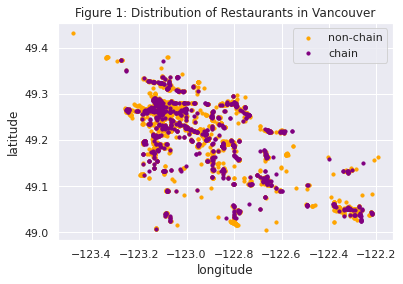

In [16]:
# Figure 1
# the scatter code is adapted from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Figure 1: Distribution of Restaurants in Vancouver')
plt.scatter(out_chain['lon'], out_chain['lat'], c="orange", s=10)
plt.scatter(in_chain['lon'], in_chain['lat'], c="purple", s=10)
plt.legend(['non-chain', 'chain'])
# The following codes are adapted from https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files .
strFile = "./results/f1_density.jpg"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()

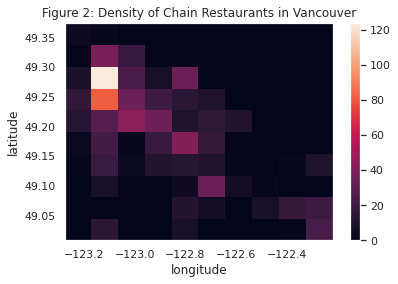

In [17]:
# Figure 2
# the hist2d code is adapted from https://www.geeksforgeeks.org/plot-2-d-histogram-in-python-using-matplotlib/
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Figure 2: Density of Chain Restaurants in Vancouver')
plt.hist2d(in_chain['lon'], in_chain['lat'])
plt.colorbar()
# The following codes are adapted from https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files .
strFile = "./results/f2_chain.jpg"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()

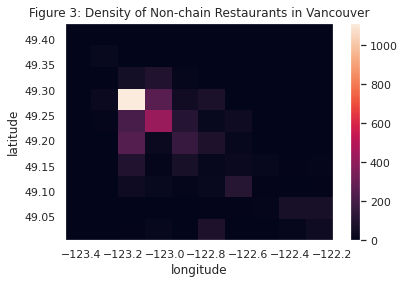

In [18]:
# Figure 3
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Figure 3: Density of Non-chain Restaurants in Vancouver')
plt.hist2d(out_chain['lon'], out_chain['lat'])
plt.colorbar()
# The following codes are adapted from https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files .
strFile = "./results/f3_non-chain.jpg"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()

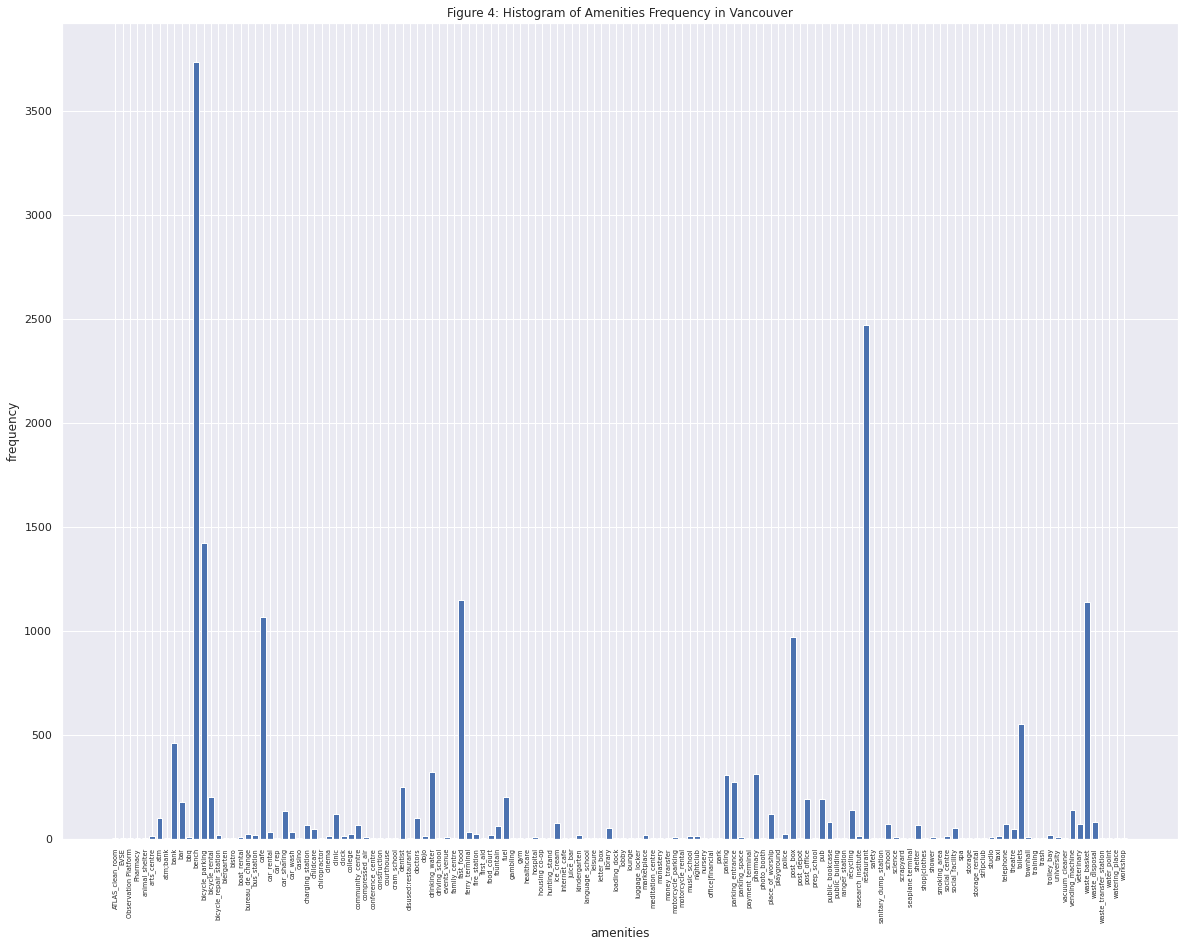

In [19]:
# Figure 4
summary=amenities.groupby('amenity').count()
summary=summary.drop(['timestamp','tags','lon','name'], axis=1)
summary=summary.rename(columns={"lat":"number"}).reset_index()
plt.figure(figsize=(20,15))
plt.xlabel('amenities')
plt.ylabel('frequency')
plt.title('Figure 4: Histogram of Amenities Frequency in Vancouver')
plt.bar(summary['amenity'],summary['number'])
plt.xticks(size=6.5,rotation='vertical')
# The following codes are adapted from https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files .
strFile = "./results/f4_amenities.jpg"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()

In [20]:
amenities['lat_lon'] = amenities[['lat', 'lon']].values.tolist()

In [21]:
# the code are adapted from https://www.huaweicloud.com/articles/7a48781dc78aa4aa5192394f46300838.html
def check_restaurant(lat_lng,example):
	lat=lat_lng[0]
	lng=lat_lng[1]
	r=6371
	dis=0.5
	dlng=2*asin(sin(dis/(2*r))/cos(lat*pi/180))
	dlng=dlng*180/pi
	dlat=dis/r
	dlat=dlat*180/pi
	max_lat=lat + dlat
	min_lat=lat - dlat
	max_lon=lng + dlng
	min_lon=lng - dlng
	result=example[(example['lat']>=min_lat)&(example['lat']<=max_lat)&(example['lon']>=min_lon)&(example['lon']<=max_lon)]
	return result.count()[0]

In [22]:
def get_num(name, example):
	amenity=amenities[amenities['amenity']==name]
	amenity['count']=amenity['lat_lon'].apply(check_restaurant, args=(example,)) # the code are adapted from https://blog.csdn.net/jewely/article/details/107888098
	return amenity[['amenity','count']]

In [23]:
not_restaurants=amenities[(amenities['amenity']!='bbq')&(amenities['amenity']!='restaurant')&(amenities['amenity']!='fast_food')
    &(amenities['amenity']!='cafe')&(amenities['amenity']!='bar')&(amenities['amenity']!='juice_bar')&(amenities['amenity']!='food_court')]
summary=not_restaurants.groupby('amenity',as_index=False).count()
summary=summary.drop(['timestamp','tags','lat','name','lat_lon'], axis=1)
summary=summary.rename(columns={"lon":"number"}).reset_index()
summary=summary[(summary['number']>=100)]
chains=pd.DataFrame()
non_chains=pd.DataFrame()
for amenity in list(summary['amenity']):
    c=get_num(amenity, in_chain)
    n=get_num(amenity, out_chain)
    chains=chains.append(c)
    non_chains=non_chains.append(n)

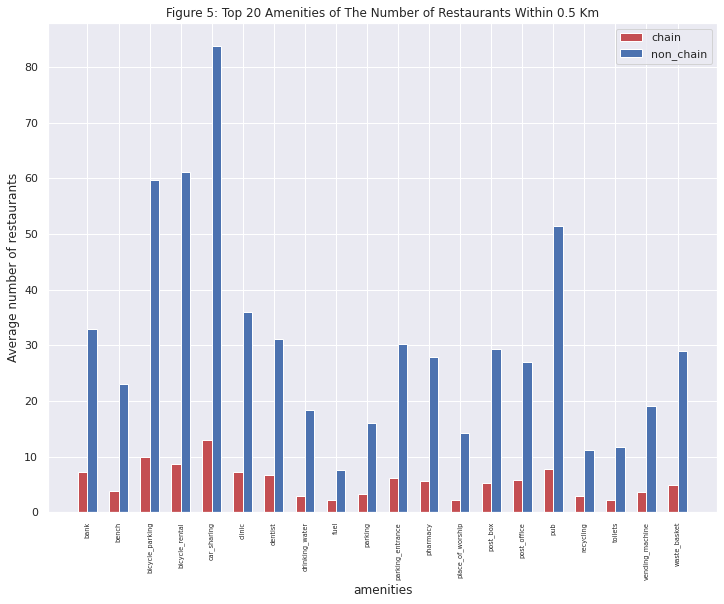

In [24]:
# Figure 5
chains=chains.groupby('amenity',as_index=False)['count'].mean()
non_chains=non_chains.groupby('amenity',as_index=False)['count'].mean()
plt.figure(figsize=(12,9))
# the double histgram are adapted from https://www.jb51.net/article/185341.htm
bar_width=0.3
index_chain=np.arange(len(chains['amenity']))
index_notchain=index_chain + bar_width
plt.bar(index_chain,height=list(chains['count']),width=bar_width,color='r', label='chain')
plt.bar(index_notchain,height=list(non_chains['count']),width=bar_width,color='b', label='non_chain')
plt.xticks(index_chain+bar_width/2, list(chains['amenity']))
plt.legend()
plt.xticks(size=6.5,rotation='vertical')
plt.xlabel('amenities')
plt.ylabel("Average number of restaurants")
# The following codes are adapted from https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files .
plt.title("Figure 5: Top 20 Amenities of The Number of Restaurants Within 0.5 Km")
strFile = "./results/f5_top20.jpg"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()

In [25]:
def has_cuisine(tags):
	return 'cuisine' in tags
temp=amenities[amenities['tags'].apply(has_cuisine)]
name=list(temp['amenity'])
cuisine=list(temp['tags'])
types=pd.DataFrame(columns=['cuisine','count'])
for i in range(len(cuisine)):
	cuisine[i]=cuisine[i]['cuisine']
	title=str(cuisine[i]).lower()
	title=title.split(';')
	if len(title)==1:
		types=types.append({"cuisine": title[0],"count":int(1)},ignore_index=True)
	else:
		for j in range(len(title)):
			types=types.append({"cuisine": title[j],"count":int(1)},ignore_index=True)

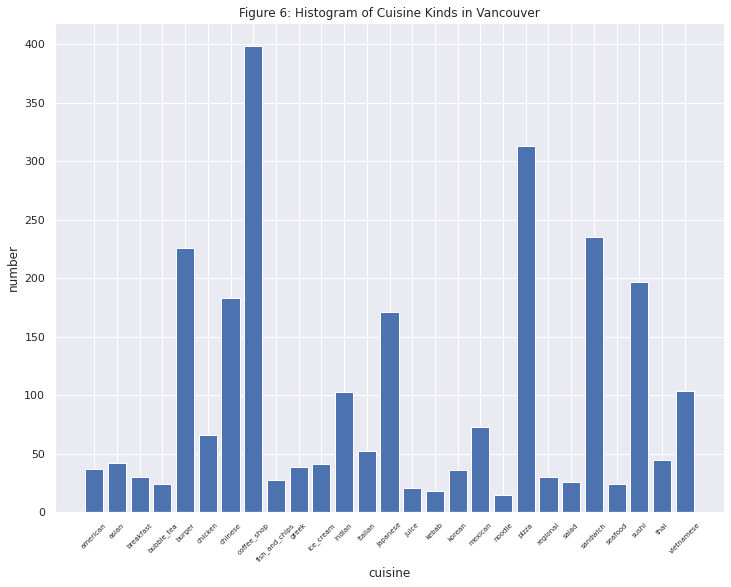

In [26]:
# Figure 6
types=types.groupby('cuisine',as_index=False).sum()
example=types[(types['count']>=15)]
plt.figure(figsize=(12,9))
plt.xlabel('cuisine')
plt.ylabel("number")
plt.title("Figure 6: Histogram of Cuisine Kinds in Vancouver")
plt.bar(example['cuisine'],example['count'])
plt.xticks(size = 7,rotation = 45)
# The following codes are adapted from https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files .
strFile = "./results/f6_cuisine.jpg"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()

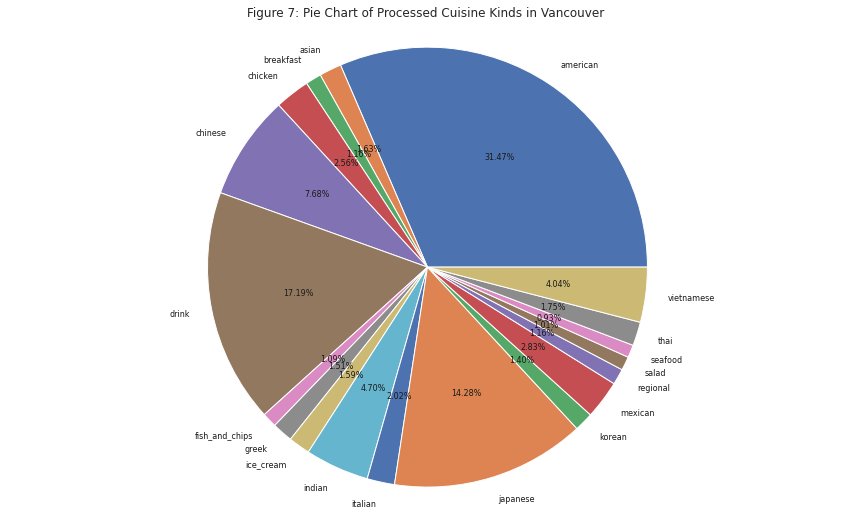

In [27]:
# Figure 7
# the pie chart code are adapted from https://www.jb51.net/article/173450.htm
example.loc[example.cuisine =='noodle','cuisine']="chinese"
example.loc[example.cuisine =='sushi','cuisine']="japanese"
example.loc[example.cuisine =='bubble_tea','cuisine']="drink"
example.loc[example.cuisine =='kebab','cuisine']="indian"
example.loc[example.cuisine =='juice','cuisine']="drink"
example.loc[example.cuisine =='coffee_shop','cuisine']="drink"
example.loc[example.cuisine =='pizza','cuisine']="american"
example.loc[example.cuisine =='sandwich','cuisine']="american"
example.loc[example.cuisine =='burger','cuisine']="american"
example=example.groupby('cuisine',as_index=False).sum()
plt.figure(figsize=(15,9))
plt.title("Figure 7: Pie Chart of Processed Cuisine Kinds in Vancouver")
plt.pie(example['count'],labels=example['cuisine'],radius=80,autopct='%1.2f%%',textprops={'fontsize':8,'color':'k'})
plt.axis('equal')
# The following codes are adapted from https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files .
strFile = "./results/f7_piecuisine.jpg"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()

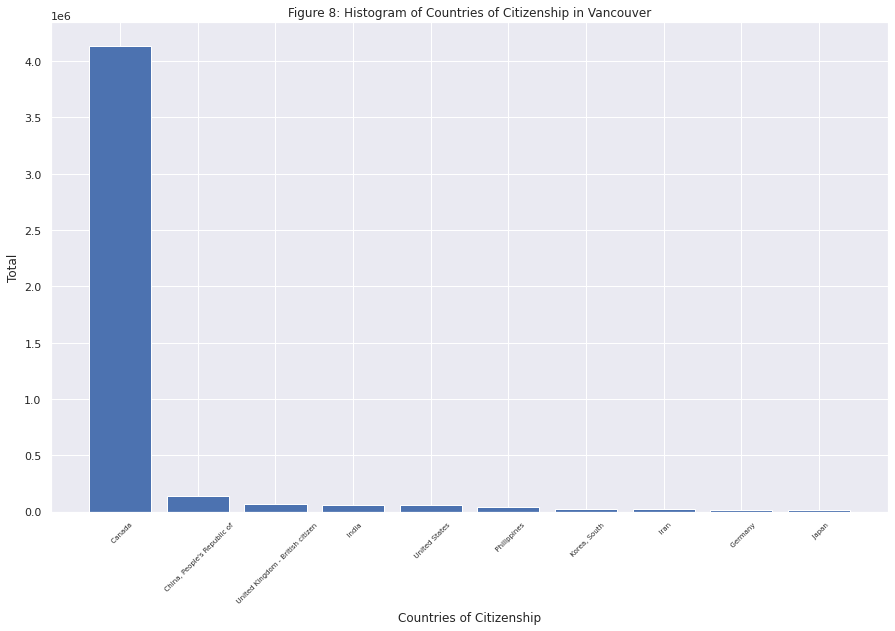

In [28]:
# Figure 8
# the data are collected from https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Rp-eng.cfm?TABID=2&LANG=E&A=R&APATH=3&DETAIL=0&DIM=0&FL=A&FREE=0&GC=59&GL=-1&GID=1341689&GK=1&GRP=1&O=D&PID=112048&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2017&THEME=120&VID=0&VNAMEE=&VNAMEF=&D1=0&D2=0&D3=0&D4=0&D5=0&D6=0#fnb2
minority=pd.read_csv("data/Data_of_minority_1.csv",encoding='unicode_escape')
minority.loc[1,'Total']=136905
minority=minority.drop([27])
top=minority.sort_values("Total",ascending=False)
top=top[0:10]
top=top[['Countries_of_citizenship','Total']]
plt.figure(figsize=(15,9))
plt.xlabel('Countries of Citizenship')
plt.ylabel("Total")
plt.title("Figure 8: Histogram of Countries of Citizenship in Vancouver")
plt.bar(top['Countries_of_citizenship'],top['Total'])
plt.xticks(size = 7, rotation = 45)
# The following codes are adapted from https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files .
strFile = "./results/f8_citizenship.jpg"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()

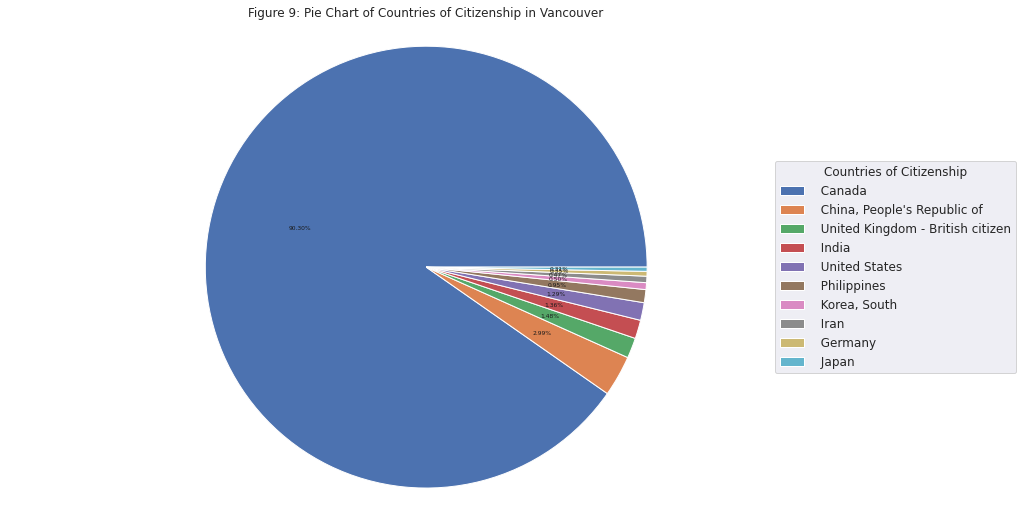

In [29]:
# Figure 9
plt.figure(figsize=(15,9))
plt.pie(top['Total'],radius=80,autopct='%1.2f%%',textprops={'fontsize':6,'color':'k'})
elements=top['Countries_of_citizenship']
plt.legend(elements,
           fontsize=12,
           title="Countries of Citizenship",
           loc="center left",
           bbox_to_anchor=(0.91, 0, 0.3, 1))
plt.axis('equal')
# The following codes are adapted from https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files .
plt.title("Figure 9: Pie Chart of Countries of Citizenship in Vancouver")
strFile = "./results/f9_piecitizenship.jpg"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()